In [1]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수선택법 ( 후진 제거 )
from sklearn.feature_selection import RFE
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

import matplotlib

# step 1. 데이터 구성하기

In [2]:
# 데이터 구성하기(MFG_TAT)
MFG_STD = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/merge/MERGE_STD.csv", engine="python",encoding='EUC-KR')
#MFG_TAT = MFG_TAT.drop(MFG_TAT.columns[0], axis=1)
MFG_STD.head()

,LOT,JUDGE,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,...,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING
0,101,0.10,0.636189,5.538706,1.078144,0.762889,17.590799,17.523281,0.661318,1.670952,...,264.972268,89.212874,5.104178,7.556106,34.203532,7.443825,33.372538,4.924696,627.332901,219.896746
1,102,0.05,1.025414,5.776531,0.640949,0.478237,34.110045,24.778808,0.767960,0.999092,...,205.687832,67.623571,44.295657,4.780443,67.170071,5.767422,31.823527,2.419221,462.337525,158.942360
2,103,0.15,1.500912,6.356304,0.611211,0.621945,19.544941,36.577552,0.728571,0.813634,...,264.137046,72.912637,4.103913,4.414092,71.397977,6.562253,20.931656,5.963927,611.876103,204.075444
3,104,0.00,1.972949,3.772393,1.246416,0.889397,23.252239,42.382671,0.836283,1.240076,...,286.353641,70.274724,5.104178,2.479389,35.138036,8.210391,32.783621,5.782005,731.668351,209.838904
4,105,0.10,1.044925,4.758693,0.608082,0.519387,23.222800,23.619757,0.851794,1.356117,...,158.371349,87.632546,5.104178,18.568508,42.178942,18.255497,39.326267,19.514097,161.130382,159.119708


# step 2. 변수 간의 경향성 파악 - 상관관계 분석

In [3]:
MFG_STD.corr().round(3)

,LOT,JUDGE,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,...,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING
LOT,1.000,0.432,0.081,0.273,-0.021,-0.051,0.168,0.097,-0.004,-0.119,...,-0.028,-0.014,0.016,0.080,0.051,0.154,-0.059,0.116,-0.020,0.044
JUDGE,0.432,1.000,-0.068,0.144,-0.083,-0.038,-0.072,-0.082,0.002,-0.058,...,-0.109,-0.079,0.013,0.114,0.000,0.150,-0.110,0.131,-0.093,-0.016
BLACK_RTD_TEMP_GLASS_START,0.081,-0.068,1.000,-0.032,0.550,0.516,0.017,0.408,-0.125,0.239,...,-0.148,0.021,0.010,-0.046,0.048,-0.029,0.053,-0.010,-0.042,-0.001
BLACK_RTD_TEMP_GLASS_END,0.273,0.144,-0.032,1.000,0.153,0.088,0.026,0.158,0.009,0.057,...,0.115,0.123,-0.060,0.015,-0.008,-0.030,0.003,-0.016,-0.060,0.110
BLACK_RTD_TEMP_WALL_START,-0.021,-0.083,0.550,0.153,1.000,0.816,-0.081,0.238,0.009,0.638,...,-0.171,0.127,0.003,-0.010,0.046,-0.067,0.057,-0.040,-0.096,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAT_6PHOS_2G_1DISPENSER,0.154,0.150,-0.029,-0.030,-0.067,0.030,0.112,-0.154,-0.102,-0.120,...,0.137,0.097,0.125,0.795,-0.098,1.000,-0.144,0.833,0.029,-0.000
TAT_6PHOS_2G_2DRY,-0.059,-0.110,0.053,0.003,0.057,-0.051,0.034,0.079,-0.026,0.062,...,-0.046,0.010,-0.047,-0.129,0.098,-0.144,1.000,-0.119,0.146,-0.009
TAT_6PHOS_3B_1DISPENSER,0.116,0.131,-0.010,-0.016,-0.040,0.058,0.034,-0.164,-0.016,-0.073,...,0.218,0.081,0.142,0.923,-0.019,0.833,-0.119,1.000,-0.053,-0.059
TAT_6PHOS_4FIRE,-0.020,-0.093,-0.042,-0.060,-0.096,-0.158,0.092,-0.019,0.009,-0.074,...,0.194,0.079,-0.098,-0.042,-0.021,0.029,0.146,-0.053,1.000,0.062


# step 3. 회귀모델 생성: 설명변수 전체

In [5]:
reg_model = smf.ols(formula='JUDGE~BLACK_RTD_TEMP_GLASS_START+BLACK_RTD_TEMP_GLASS_END+ \
                               BLACK_RTD_TEMP_WALL_START+BLACK_RTD_TEMP_WALL_MAX+BLACK_RTD_PRES_START+ \
                               BLACK_RTD_PRES_END+BLACK_RTD_TEMP_GLASS_OUT+BLACK_RTD_TEMP_HOOD_START+ \
                               BLACK_RTD_TEMP_HOOD_MAX+AG_RTD_TEMP_GLASS_START+AG_RTD_TEMP_GLASS_END+ \
                               AG_RTD_TEMP_WALL_START+AG_RTD_TEMP_WALL_MAX+AG_RTD_PRES_START+AG_RTD_PRES_END+\
                               AG_RTD_TEMP_GLASS_OUT+AG_RTD_TEMP_HOOD_START+AG_RTD_TEMP_HOOD_MAX+\
                               AG_EXPOSURE_TEMP_MASK+BUS_DEVELOP_TEMP_OVEN1+BUS_DEVELOP_TEMP_OVEN2+\
                               BUS_DEVELOP_TEMP_OVEN3+BUS_DEVELOP_TEMP_TANK1+ BUS_DEVELOP_TEMP_TANK2+\
                               BUS_DEVELOP_TEMP_TANK3 +BUS_DEVELOP_PRES2+BUS_DEVELOP_PRES3+\
                               BUS_FIRE_TEMP_KEEP_CH01+BUS_FIRE_TEMP_KEEP_CH02+BUS_FIRE_TEMP_KEEP_CH03+\
                               BUS_FIRE_TEMP_ANEAL_CH01+BUS_FIRE_TEMP_ANEAL_CH02+	BUS_FIRE_TEMP_ANEAL_CH03+\
                               DIELEC_FIRE_TEMP_KEEP_CH01+DIELEC_FIRE_TEMP_ANEAL_CH01+DIELEC_FIRE_TEMP_ANEAL_CH02+\
                               DIELEC_FIRE_TEMP_ANEAL_CH03+DIELEC_FIRE_EXHAUST_HEAT1+DIELEC_FIRE_EXHAUST_HEAT2+\
                               DIELEC_FIRE_EXHAUST_HEAT3+DIELEC_FIRE_EXHAUST_HEAT4+DIELEC_FIRE_EXHAUST_HEAT5+\
                               DIELEC_FIRE_EXHAUST_HEAT6+DIELEC_FIRE_EXHAUST_HEAT7+PHOS_R_DRY_TEMP_GLASS_START+\
                               PHOS_R_DRY_TEMP_GLASS_END+PHOS_R_DRY_TEMP_WALL_START+PHOS_R_DRY_TEMP_WALL_MAX+\
                               PHOS_R_DRY_PRES_START+PHOS_R_DRY_PRES_END+PHOS_R_DRY_TEMP_GLASS_OUT+\
                               PHOS_R_DRY_TEMP_HOOD_START+PHOS_R_DRY_TEMP_HOOD_MAX+PHOS_G_DRY_TEMP_GLASS_START+\
                               PHOS_G_DRY_TEMP_GLASS_END+PHOS_G_DRY_TEMP_WALL_START+PHOS_G_DRY_TEMP_WALL_MAX+\
                               PHOS_G_DRY_PRES_START+PHOS_G_DRY_PRES_END+PHOS_G_DRY_TEMP_GLASS_OUT+\
                               PHOS_G_DRY_TEMP_HOOD_START+PHOS_G_DRY_TEMP_HOOD_MAX+\
                               PHOS_FIRE_TEMP_ANEAL_CH01+PHOS_FIRE_TEMP_ANEAL_CH02+PHOS_FIRE_TEMP_ANEAL_CH03+\
                               PHOS_FIRE_TEMP_ANEAL_CH04+PHOS_FIRE_EXHAUST_HEAT1+PHOS_FIRE_EXHAUST_HEAT2+\
                               PHOS_FIRE_EXHAUST_HEAT3+PHOS_FIRE_EXHAUST_HEAT4+\
                               TAT_1BLACK_1PRINT+TAT_1BLACK_2RTD+TAT_2AG_1PRINT+TAT_2AG_2RTD+TAT_2AG_3EXPOSURE+TAT_3BUS_1DEVELOP+TAT_3BUS_2FIRE+TAT_4DIELEC_FIRE+	TAT_5MGO+TAT_6PHOS_1R_1DISPENSER+TAT_6PHOS_1R_2DRY+TAT_6PHOS_2G_1DISPENSER+TAT_6PHOS_2G_2DRY+TAT_6PHOS_3B_1DISPENSER+TAT_6PHOS_4FIRE+TAT_8AGING', data=MFG_STD)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  JUDGE   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     1.593
Date:                Sat, 22 Feb 2020   Prob (F-statistic):             0.0102
Time:                        22:35:55   Log-Likelihood:                 348.16
No. Observations:                 200   AIC:                            -522.3
Df Residuals:                     113   BIC:                            -235.4
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

# step 3. 회귀 모델 생성: 설명변수 간의 다중공선성 확인

In [7]:
df_STD_x = MFG_STD.drop('JUDGE', axis=1)
df_STD_x_const = add_constant(df_STD_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_STD_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_STD_x_const.values,i) for i in range(df_STD_x_const.shape[1])]

df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
71,PHOS_FIRE_EXHAUST_HEAT4,1.788
68,PHOS_FIRE_EXHAUST_HEAT1,1.817
44,DIELEC_FIRE_EXHAUST_HEAT6,1.882
53,PHOS_R_DRY_TEMP_HOOD_START,1.884
59,PHOS_G_DRY_PRES_START,1.897
...,...,...
58,PHOS_G_DRY_TEMP_WALL_MAX,40.089
62,PHOS_G_DRY_TEMP_HOOD_START,44.803
19,AG_RTD_TEMP_HOOD_MAX,276.095
18,AG_RTD_TEMP_HOOD_START,286.237


# step 3. 회귀 모델 생성: 설명변수 다중공선성 처리

In [11]:
reg_model = smf.ols(formula='JUDGE~BLACK_RTD_TEMP_GLASS_START+BLACK_RTD_TEMP_GLASS_END+ \
                               BLACK_RTD_TEMP_WALL_START+BLACK_RTD_TEMP_WALL_MAX+BLACK_RTD_PRES_START+ \
                               BLACK_RTD_PRES_END+BLACK_RTD_TEMP_GLASS_OUT+BLACK_RTD_TEMP_HOOD_START+ \
                               BLACK_RTD_TEMP_HOOD_MAX+AG_RTD_TEMP_GLASS_START+AG_RTD_TEMP_GLASS_END+ \
                               AG_RTD_TEMP_WALL_START+AG_RTD_TEMP_WALL_MAX+AG_RTD_PRES_START+AG_RTD_PRES_END+\
                               AG_RTD_TEMP_GLASS_OUT+AG_RTD_TEMP_HOOD_MAX+\
                               AG_EXPOSURE_TEMP_MASK+BUS_DEVELOP_TEMP_OVEN1+BUS_DEVELOP_TEMP_OVEN2+\
                               BUS_DEVELOP_TEMP_OVEN3+BUS_DEVELOP_TEMP_TANK1+ BUS_DEVELOP_TEMP_TANK2+\
                               BUS_DEVELOP_TEMP_TANK3 +BUS_DEVELOP_PRES2+BUS_DEVELOP_PRES3+\
                               BUS_FIRE_TEMP_KEEP_CH01+BUS_FIRE_TEMP_KEEP_CH02+BUS_FIRE_TEMP_KEEP_CH03+\
                               BUS_FIRE_TEMP_ANEAL_CH01+BUS_FIRE_TEMP_ANEAL_CH02+	BUS_FIRE_TEMP_ANEAL_CH03+\
                               DIELEC_FIRE_TEMP_KEEP_CH01+DIELEC_FIRE_TEMP_ANEAL_CH01+DIELEC_FIRE_TEMP_ANEAL_CH02+\
                               DIELEC_FIRE_TEMP_ANEAL_CH03+DIELEC_FIRE_EXHAUST_HEAT1+DIELEC_FIRE_EXHAUST_HEAT2+\
                               DIELEC_FIRE_EXHAUST_HEAT3+DIELEC_FIRE_EXHAUST_HEAT4+DIELEC_FIRE_EXHAUST_HEAT5+\
                               DIELEC_FIRE_EXHAUST_HEAT6+DIELEC_FIRE_EXHAUST_HEAT7+PHOS_R_DRY_TEMP_GLASS_START+\
                               PHOS_R_DRY_TEMP_GLASS_END+PHOS_R_DRY_TEMP_WALL_START+PHOS_R_DRY_TEMP_WALL_MAX+\
                               PHOS_R_DRY_PRES_START+PHOS_R_DRY_PRES_END+PHOS_R_DRY_TEMP_GLASS_OUT+\
                               PHOS_R_DRY_TEMP_HOOD_START+PHOS_R_DRY_TEMP_HOOD_MAX+PHOS_G_DRY_TEMP_GLASS_START+\
                               PHOS_G_DRY_TEMP_GLASS_END+PHOS_G_DRY_TEMP_WALL_START+PHOS_G_DRY_TEMP_WALL_MAX+\
                               PHOS_G_DRY_PRES_START+PHOS_G_DRY_PRES_END+PHOS_G_DRY_TEMP_GLASS_OUT+\
                               PHOS_G_DRY_TEMP_HOOD_MAX+\
                               PHOS_FIRE_TEMP_ANEAL_CH01+PHOS_FIRE_TEMP_ANEAL_CH02+PHOS_FIRE_TEMP_ANEAL_CH03+\
                               PHOS_FIRE_TEMP_ANEAL_CH04+PHOS_FIRE_EXHAUST_HEAT1+PHOS_FIRE_EXHAUST_HEAT2+\
                               PHOS_FIRE_EXHAUST_HEAT3+PHOS_FIRE_EXHAUST_HEAT4+\
                               TAT_1BLACK_1PRINT+TAT_1BLACK_2RTD+TAT_2AG_1PRINT+TAT_2AG_2RTD+TAT_2AG_3EXPOSURE+TAT_3BUS_1DEVELOP+TAT_3BUS_2FIRE+TAT_4DIELEC_FIRE+	TAT_5MGO+TAT_6PHOS_1R_1DISPENSER+TAT_6PHOS_1R_2DRY+TAT_6PHOS_2G_1DISPENSER+TAT_6PHOS_2G_2DRY+TAT_6PHOS_3B_1DISPENSER+TAT_6PHOS_4FIRE+TAT_8AGING', data=MFG_STD)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  JUDGE   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     1.622
Date:                Sat, 22 Feb 2020   Prob (F-statistic):            0.00807
Time:                        22:38:12   Log-Likelihood:                 346.89
No. Observations:                 200   AIC:                            -523.8
Df Residuals:                     115   BIC:                            -243.4
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [13]:
df_STD_x = MFG_STD.drop(['JUDGE','AG_RTD_TEMP_HOOD_START','PHOS_G_DRY_TEMP_HOOD_START','PHOS_G_DRY_TEMP_HOOD_START'], axis=1)
df_STD_x_const = add_constant(df_STD_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_STD_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_STD_x_const.values,i) for i in range(df_STD_x_const.shape[1])]

df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

,variable,VIF
69,PHOS_FIRE_EXHAUST_HEAT4,1.773
58,PHOS_G_DRY_PRES_START,1.798
66,PHOS_FIRE_EXHAUST_HEAT1,1.810
67,PHOS_FIRE_EXHAUST_HEAT2,1.829
43,DIELEC_FIRE_EXHAUST_HEAT6,1.863
...,...,...
83,TAT_6PHOS_3B_1DISPENSER,18.670
64,PHOS_FIRE_TEMP_ANEAL_CH03,22.184
56,PHOS_G_DRY_TEMP_WALL_START,29.975
57,PHOS_G_DRY_TEMP_WALL_MAX,36.288


In [23]:
'''다중공선성 거의 해결됨'''

'다중공선성 거의 해결됨'

# step 4. 후진제거법을 이용한 변수 선택

In [11]:
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적 제거
# 목표 변수 분리
df_raw_y = df_raw['FAT']

model = LinearRegression()

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_raw_x, df_raw_y)

# 선택된 변수
selected_cols = df_raw_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_raw_x.columns[~rfe.support_]

print('Selected Variables: {}'.format(selected_cols))
print('Removed Variables: {}'.format(removed_cols))


Selected Variables: Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables: Index(['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


# step 4. 후진제거법을 이용한 변수 선택 및 모델 생성

In [12]:
rfe_reg_model = smf.ols(formula = 'FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST', data=df_raw)

rfe_reg_result = rfe_reg_model.fit()

print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           4.38e-68
Time:                        13:46:48   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

In [24]:
'''목 둘레, 복부둘레, 엉덩이 둘레, 팔뚝 둘레, 손목 둘레 변수선택'''

'목 둘레, 복부둘레, 엉덩이 둘레, 팔뚝 둘레, 손목 둘레 변수선택'

In [25]:
'''위처럼 해석하기'''

'위처럼 해석하기'

# step 4. 후진제거법을 이용한 변수 선택 = 선택된 설명변수의 다중공선성 재진단

In [13]:
# 후진제거법에 의하여 선택된 데이터
df_raw_x_rfe = df_raw_x[selected_cols]
df_raw_x_rfe_const = add_constant(df_raw_x_rfe)

df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_raw_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_raw_x_rfe_const.values, i) for i in range(df_raw_x_rfe_const.shape[1])]
df_rfe_vif.sort_values('VIF', inplace=True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
4,FOREARM,1.769
5,WRIST,2.430
1,NECK,3.565
3,HIP,4.662
2,ABDOMEN,4.818
0,const,509.235


In [26]:
'''다중공선성 문제 없음'''

'다중공선성 문제 없음'

# step 5. 변수중요도 확인

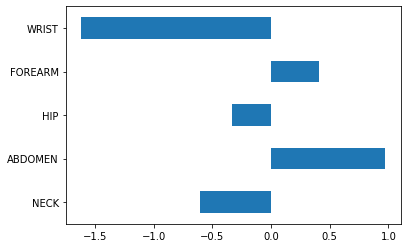

In [14]:
# 비표준화 회귀계수의 경우
df_reg_coef = pd.DataFrame({'Coef': rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y='Coef', legend=False)

In [27]:
'''중요도는 회귀계수의 절댓값 크기
손목 두께는 얇을수록 체질비만도가 높음
복부 둘레가 커질수록 체질비만도가 높음
'''

'중요도는 회귀계수의 절댓값 크기\n손목 두께는 얇을수록 체질비만도가 높음\n복부 둘레가 커질수록 체질비만도가 높음\n'

In [15]:
# 표준화 회귀계수의 경우

scaler = StandardScaler()

# Scale 변환대상 변수
cols = df_raw_x.columns

# Scale 변환
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

# 목표변수 추가
df_scaled['FAT'] = df_raw['FAT']
reg_model_scaled = smf.ols(formula = 'FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST', data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           4.38e-68
Time:                        13:46:49   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

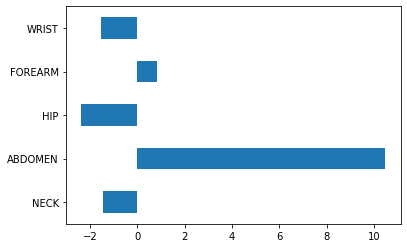

In [16]:
df_reg_coef = pd.DataFrame({'Coef': reg_result_scaled.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y='Coef', legend=False)

In [28]:
'''회귀계수의 방향은 동일하나 중요도 크기가 변함
복부둘레가 가장 중요하고 손목 두께의 중요도는 줄어든 반면 엉덩이 변수 중요도 증가.
단 모델의 통계량은 변화 없음
'''

'회귀계수의 방향은 동일하나 중요도 크기가 변함\n복부둘레가 가장 중요하고 손목 두께의 중요도는 줄어든 반면 엉덩이 변수 중요도 증가.\n단 모델의 통계량은 변화 없음\n'